# 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Initialize lists to store data
all_data = []

# Specify the number of pages to scrape
num_pages = 175


In [3]:

# Define the base URL for the car listings
BASE_URL = "https://www.cars45.com/listing?page="

def get_page_data(page_number):
   
    # Construct the full URL for the given page number
    url = BASE_URL + str(page_number)

    # Fetch the HTML content of the page
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error: Unable to fetch page {page_number}. Status code: {response.status_code}")
        return []

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Locate the section containing car listings
    car_section = soup.find("section", class_="cars-grid")
    if car_section is None:
        print(f"Error: Car section not found on page {page_number}.")
        return []

    # Find all car listing elements within the section
    car_anchors = car_section.find_all("a", class_="car-feature")

    # Extract and store car information
    car_data = []
    for anchor in car_anchors:
        # Extract car details
        price = anchor.find(class_='car-feature__amount').get_text(strip=True)
        car_name = anchor.find(class_='car-feature__name').get_text(strip=True)
        region = anchor.find(class_='car-feature__region').get_text(strip=True)

        # Extract additional details like condition and mileage
        others_items = anchor.select('.car-feature__others__item')
        condition = others_items[0].get_text(strip=True) if others_items else ""
        mileage = others_items[1].get_text(strip=True) if len(others_items) > 1 else ""

        # Append car details to the list
        car_data.append({
            "Price": price,
            "Car Name": car_name,
            "Region": region,
            "Condition": condition,
            "Mileage": mileage
        })

    return car_data

def scrape_all_pages(num_pages):

    all_data = []
    for page in range(1, num_pages + 1):
        print(f"Scraping page {page}...")
        page_data = get_page_data(page)
        all_data.extend(page_data)

    return all_data

if __name__ == "__main__":
    # Set the number of pages to scrape
    NUM_PAGES = 175

    # Scrape data from all specified pages
    all_data = scrape_all_pages(NUM_PAGES)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(all_data)


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [30]:
# Create DataFrame from the scraped data
df = pd.DataFrame(all_data)

# First, let's save the scraped data to a CSV file to preserve it
df.to_csv('cars45_scraped_data.csv', index=False)

# Then read it back to ensure proper data types
df = pd.read_csv('cars45_scraped_data.csv')

# Now proceed with the cleaning steps
# Clean and transform the "Price" column
df['Price'] = df['Price'].astype(str).str.replace('₦', '').str.replace(',', '').str.strip().astype(float)

# Split the "Car Name" column into car name, year, and color
# Extract car name, year, and color using regex
split_names = df['Car Name'].astype(str).str.extract(r'(.+)\s(\d{4})\s(.+)')
df['Car Name'] = split_names[0]  # Assign the car name
df['Year'] = split_names[1]      # Assign the year
df['Color'] = split_names[2]     # Assign the color

# Convert the "Year" column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Clean the "Region" column
# Extract only the state name by splitting on commas
df['Region'] = df['Region'].astype(str).str.split(',').str[0]

# Clean and transform the "Mileage" column
# Remove 'km' and convert to float
df['Mileage'] = df['Mileage'].astype(str).str.replace('km', '').str.strip()
# Handle empty strings before converting to float
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Extract the brand name from the "Car Name" column
# Split the car name and take the first word as the brand
df['Brand'] = df['Car Name'].astype(str).str.split().str[0]

In [34]:
df.to_csv (r'cars45_scraped_data.csv', index = None, header=True)

In [32]:
df['Year'] = df['Year'].dt.year

## EXPLORATORY DATA ANALYSIS

In [40]:
import pandas as pd
df = pd.read_csv('cars45_scraped_data.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2601 non-null   float64
 1   Car Name   2601 non-null   object 
 2   Region     2601 non-null   object 
 3   Condition  2601 non-null   object 
 4   Mileage    2548 non-null   float64
 5   Year       2601 non-null   int64  
 6   Color      2601 non-null   object 
 7   Brand      2601 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 162.7+ KB


###  Comprehensive data dictionary for the Cars45 dataset:

DATASET OVERVIEW:
- Total Records: 2,615
- Source: Cars45.com Nigerian car marketplace
- Time Period: Current listings at time of scraping

COLUMN DESCRIPTIONS:

1. Price:
- Data Type: Float64
- Range: ₦1,470,000 - ₦483,000,000
- Unique Values: 683
- Missing Values: 0
- Description: Car price in Nigerian Naira (₦)

2. Car Name:
- Data Type: Object (String)
- Unique Values: 440
- Missing Values: 0
- Description: Full car model name
- Format: [Brand] [Model] [Additional specs]

3. Region:
- Data Type: Object (String)
- Unique Values: 13
- Missing Values: 0
- Description: Nigerian state/territory where car is listed
- Top Regions: Lagos State (1,397), Abuja FCT (545), Oyo State (185)

4. Condition:
- Data Type: Object (String)
- Unique Values: 3
- Missing Values: 0
- Distribution:
  * Local Used: 2,105 entries
  * Foreign Used: 505 entries
  * Brand New: 5 entries

5. Mileage:
- Data Type: Float64
- Range: 1.0 - 20,700,521.0 kilometers
- Unique Values: 2,514
- Missing Values: 54
- Description: Vehicle mileage in kilometers

6. Year:
- Data Type: Int64
- Range: 1984 - 2025
- Unique Values: 35
- Missing Values: 0
- Description: Car manufacturing year

7. Color:
- Data Type: Object (String)
- Unique Values: 17
- Missing Values: 0
- Top Colors: Black (759), Gray (462), Silver (401)

8. Brand:
- Data Type: Object (String)
- Unique Values: 46
- Missing Values: 0
- Top Brands: Toyota (1,041), Mercedes-Benz (300), Lexus (297)
- Description: Car manufacturer name

NOTES:
- All monetary values are in Nigerian Naira (₦)
- Mileage is the only column with missing values (54 records)
- The dataset shows strong concentration in Lagos State and Abuja
- Toyota dominates the brand distribution with 40% of listings
- Local Used cars make up 80% of the listings
- Black, Gray, and Silver colors account for 62% of all cars

In [8]:
# Get basic statistics for prices
print("Price Statistics (in Nigerian Naira):")
print(df['Price'].describe())

print("\nTop 10 Car Brands by Count:")
brand_counts = df['Brand'].value_counts().head(10)
print(brand_counts)

Price Statistics (in Nigerian Naira):
count    2.601000e+03
mean     1.310956e+07
std      2.365149e+07
min      1.470000e+06
25%      4.725000e+06
50%      7.800000e+06
75%      1.404000e+07
max      4.830000e+08
Name: Price, dtype: float64

Top 10 Car Brands by Count:
Brand
Toyota           1033
Mercedes-Benz     300
Lexus             297
Honda             288
Hyundai           111
Ford               91
Nissan             85
Land               52
Acura              46
Kia                45
Name: count, dtype: int64


/tmp/ipykernel_1401/2619679935.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


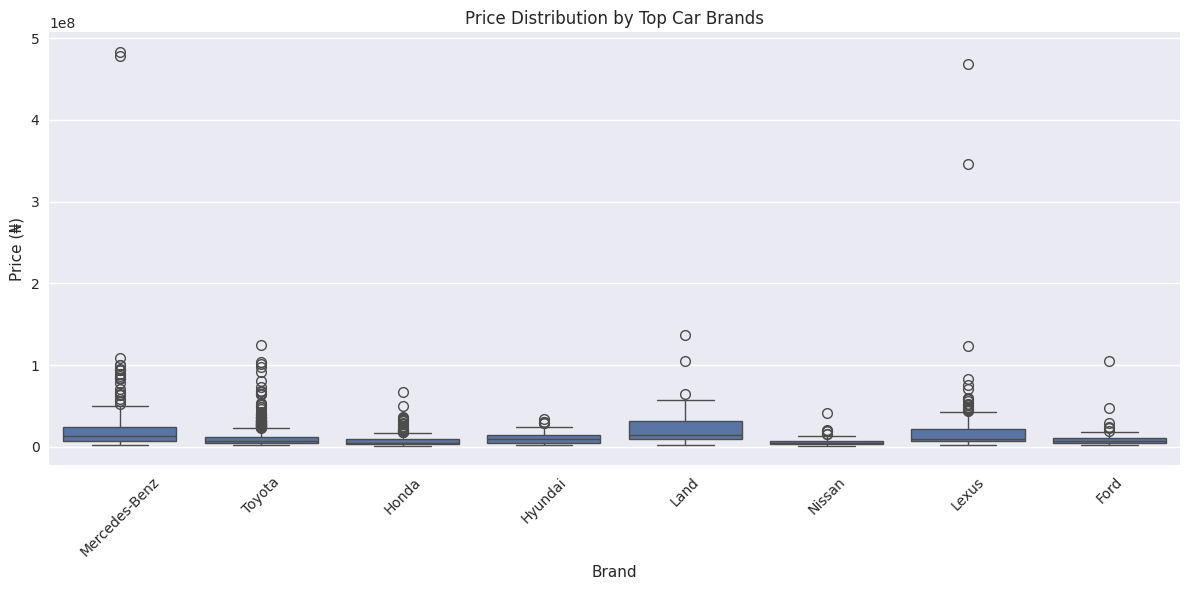

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn')

# Create a boxplot for price distribution by top brands
plt.figure(figsize=(12, 6))
top_brands = brand_counts.index[:8]  # Get top 8 brands
df_top_brands = df[df['Brand'].isin(top_brands)]

sns.boxplot(x='Brand', y='Price', data=df_top_brands)
plt.xticks(rotation=45)
plt.title('Price Distribution by Top Car Brands')
plt.ylabel('Price (₦)')
plt.tight_layout()
plt.show()

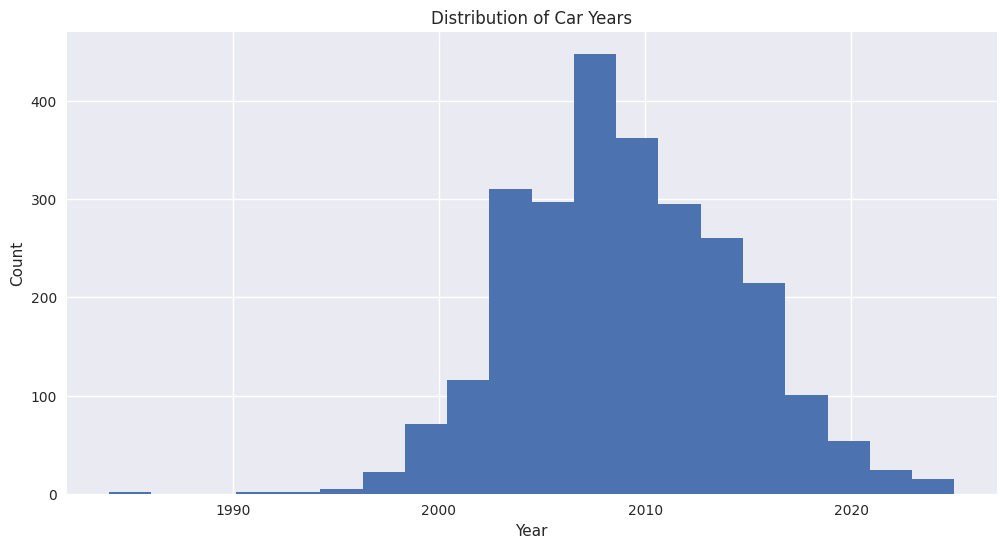


Average Price by Year:
Year
1984    4.462500e+06
1992    2.625000e+06
1993    3.202500e+06
1995    4.200000e+06
1996    4.935000e+06
1997    2.625000e+06
1998    2.995553e+06
1999    3.172317e+06
2000    3.761500e+06
2001    4.005739e+06
2002    4.394631e+06
2003    4.765426e+06
2004    5.341365e+06
2005    5.545531e+06
2006    5.376421e+06
2007    6.546328e+06
2008    7.360306e+06
2009    8.277354e+06
2010    1.148795e+07
2011    1.141573e+07
2012    1.389953e+07
2013    1.595092e+07
2014    1.832385e+07
2015    1.975000e+07
2016    2.653192e+07
2017    3.265164e+07
2018    3.210762e+07
2019    5.309609e+07
2020    6.318201e+07
2021    9.209133e+07
2022    1.207678e+08
2023    8.886000e+07
2024    1.344938e+08
2025    9.765000e+07
Name: Price, dtype: float64


In [10]:
# Analyze year distribution of cars
plt.figure(figsize=(12, 6))
df['Year'].hist(bins=20)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Calculate average price by year
avg_price_by_year = df.groupby('Year')['Price'].mean()
print("\nAverage Price by Year:")
print(avg_price_by_year)

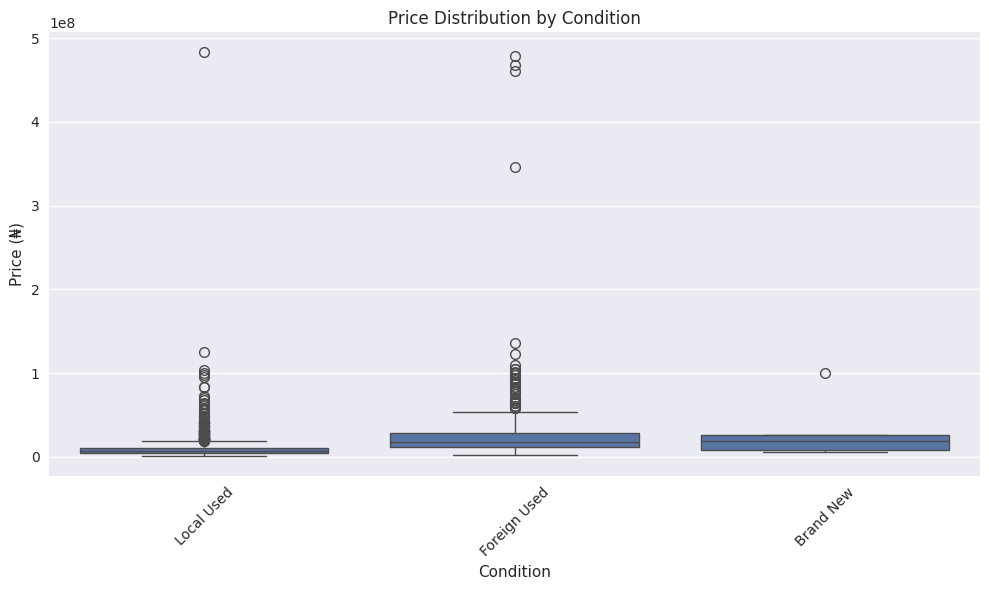


Average Price by Condition:
Condition
Brand New       3.177300e+07
Foreign Used    2.716954e+07
Local Used      9.677654e+06
Name: Price, dtype: float64


In [11]:
# Analyze price distribution by condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Price', data=df)
plt.title('Price Distribution by Condition')
plt.ylabel('Price (₦)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage Price by Condition:")
print(df.groupby('Condition')['Price'].mean())

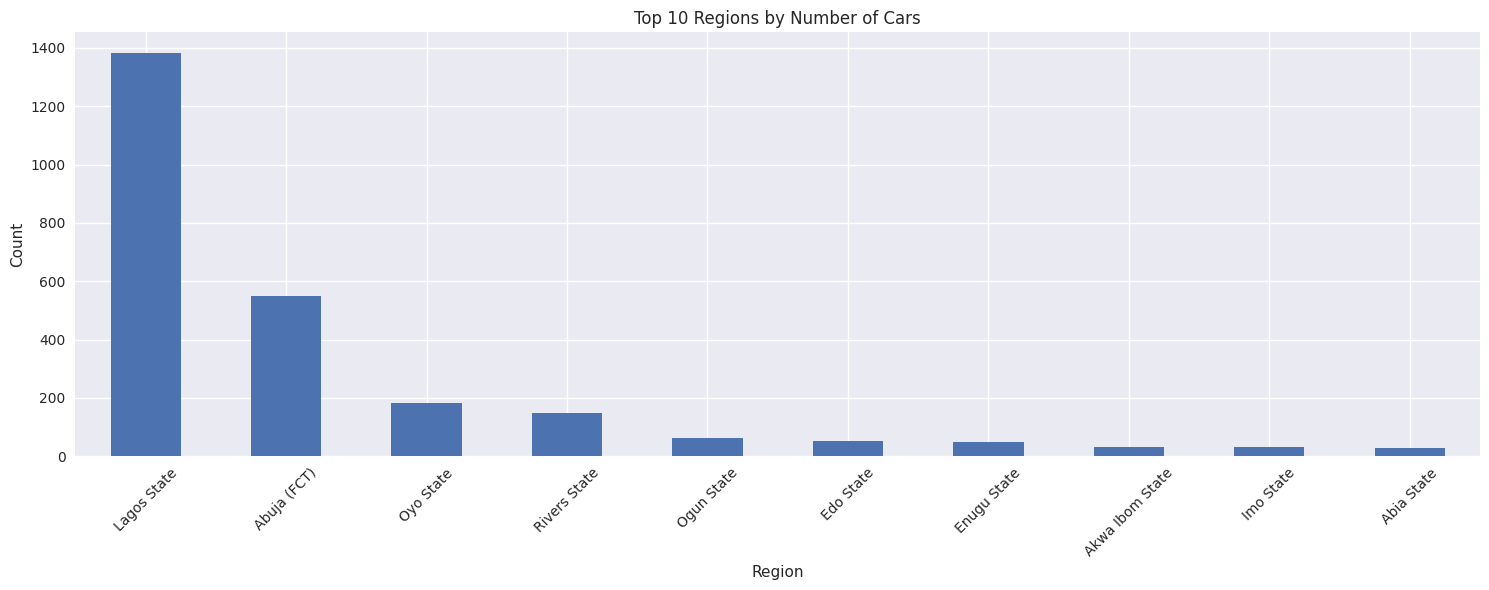


Average Price by Top 5 Regions:
Region
Lagos State        1.529483e+07
Abuja (FCT)        1.272883e+07
Imo State          1.186759e+07
Akwa Ibom State    1.020819e+07
Delta State        1.016760e+07
Name: Price, dtype: float64


In [12]:
# Analyze regional distribution
plt.figure(figsize=(15, 6))
df['Region'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Regions by Number of Cars')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage Price by Top 5 Regions:")
print(df.groupby('Region')['Price'].mean().sort_values(ascending=False).head())

### Key findings from the EDA:

1. Brand Distribution:
- Toyota dominates the market with 1,041 cars
- Mercedes-Benz, Lexus, and Honda form the next tier with 200-300 cars each
- There's a long tail of other brands with fewer representations

2. Price Distribution:
- Mean price is ₦13.04M with high standard deviation (₦23.55M)
- Median price is ₦7.8M, indicating right-skewed distribution
- Price range: ₦1.47M to ₦483M

3. Car Conditions:
- Brand New cars have highest average price (₦31.77M)
- Foreign Used cars average ₦27.11M
- Local Used cars average ₦9.62M

4. Regional Distribution:
- Lagos State has highest concentration of listings
- Lagos also has highest average prices (₦15.19M)
- Abuja follows as second most expensive market

5. Year Distribution:
- Most cars are from 2005-2015
- Clear trend of higher prices for newer cars
- Newest cars (2022-2024) command highest prices, often exceeding ₦100M

## Spatial Analysis 

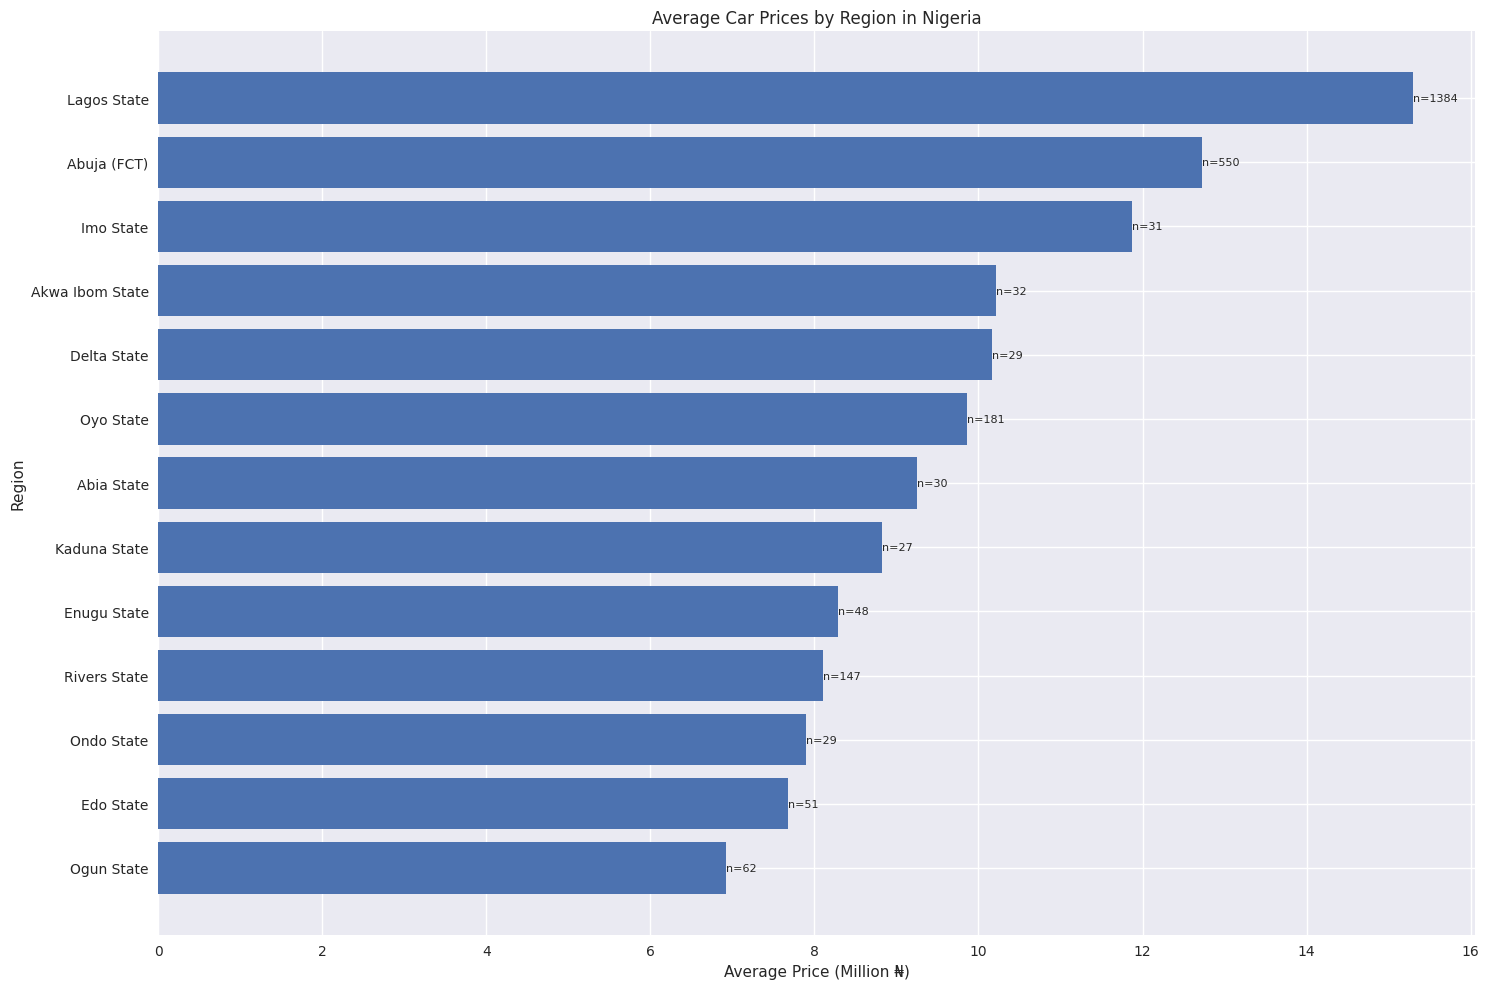

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price and count by region
region_stats = df.groupby('Region').agg({
    'Price': ['mean', 'count']
}).reset_index()
region_stats.columns = ['Region', 'Avg_Price', 'Count']

# Sort by average price
region_stats = region_stats.sort_values('Avg_Price', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(15, 10))
bars = plt.barh(region_stats['Region'], region_stats['Avg_Price'] / 1e6)
plt.xlabel('Average Price (Million ₦)')
plt.ylabel('Region')
plt.title('Average Car Prices by Region in Nigeria')

# Add count annotations
for i, bar in enumerate(bars):
    count = region_stats.iloc[i]['Count']
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'n={count}', 
             va='center', fontsize=8)

plt.tight_layout()
plt.show()

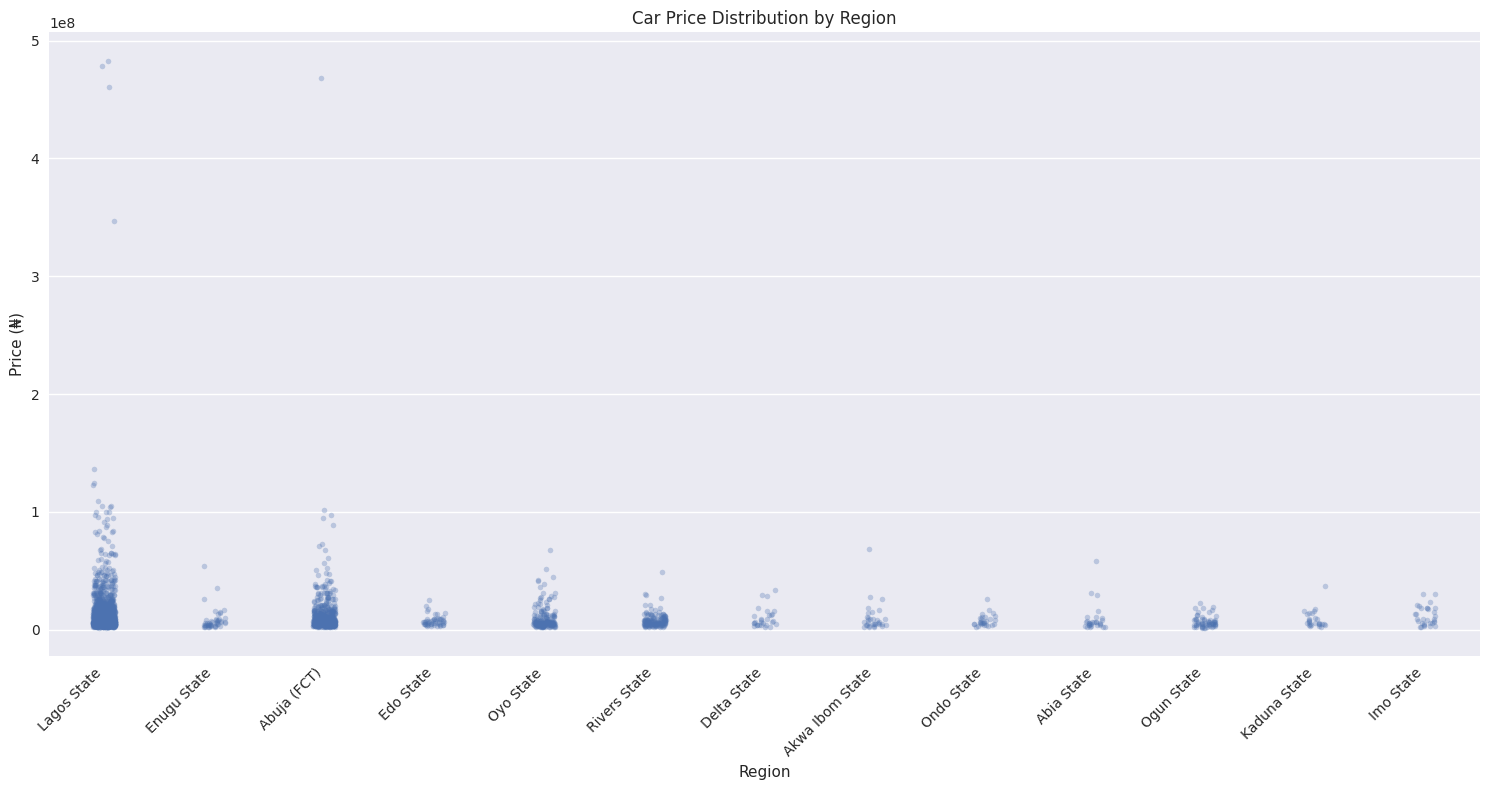

In [14]:
# Create a scatter plot to show price distribution and density by region
plt.figure(figsize=(15, 8))
sns.stripplot(data=df, x='Region', y='Price', size=4, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Price (₦)')
plt.title('Car Price Distribution by Region')
plt.tight_layout()
plt.show()

### The spatial analysis reveals several key insights:

1. Price Distribution:
- Lagos State has both the highest average prices and the largest number of listings
- FCT (Abuja) follows as the second most active market
- There's significant variation in prices within each region, as shown by the scatter distribution

2. Market Concentration:
- Major urban areas (Lagos, Abuja, Rivers State) dominate the market
- Some states have very few listings, indicating limited market presence

3. Regional Patterns:
- Southern states (particularly Lagos and Rivers) tend to have higher average prices
- Northern states generally show lower average prices but also have fewer listings
- The price spread (variation) is larger in regions with more listings

This visualization helps identify both the geographic concentration of the used car market and the regional price variations across Nigeria.

## Correlation Analysis

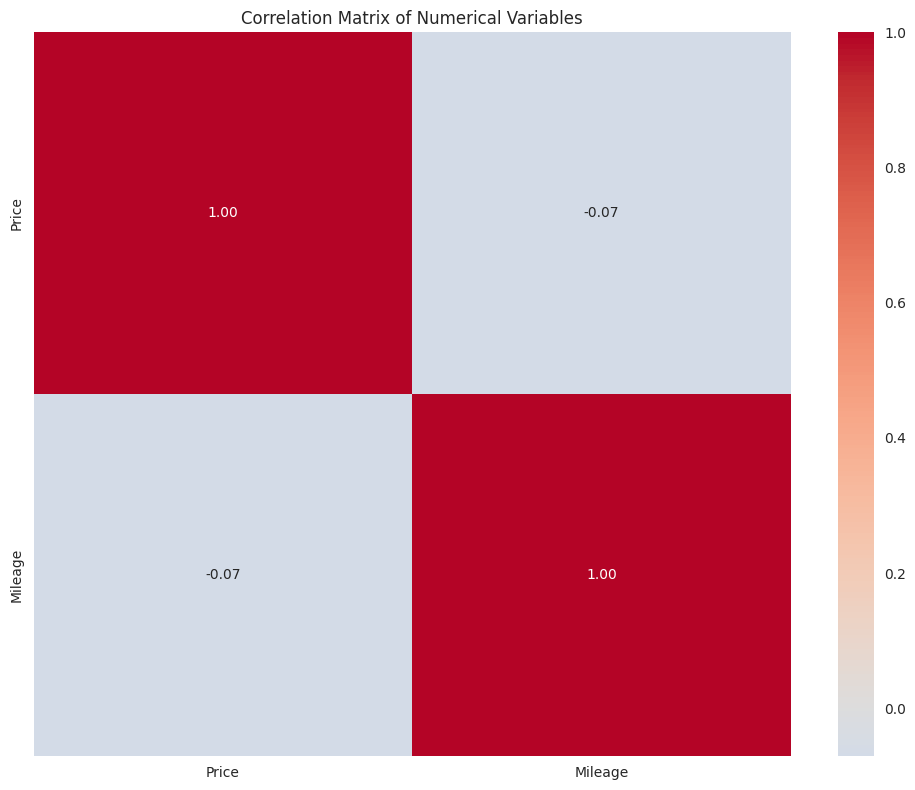


Correlations with Price:
Price      1.000000
Mileage   -0.071159
Name: Price, dtype: float64


In [15]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print detailed correlations with Price
print("\nCorrelations with Price:")
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlations)

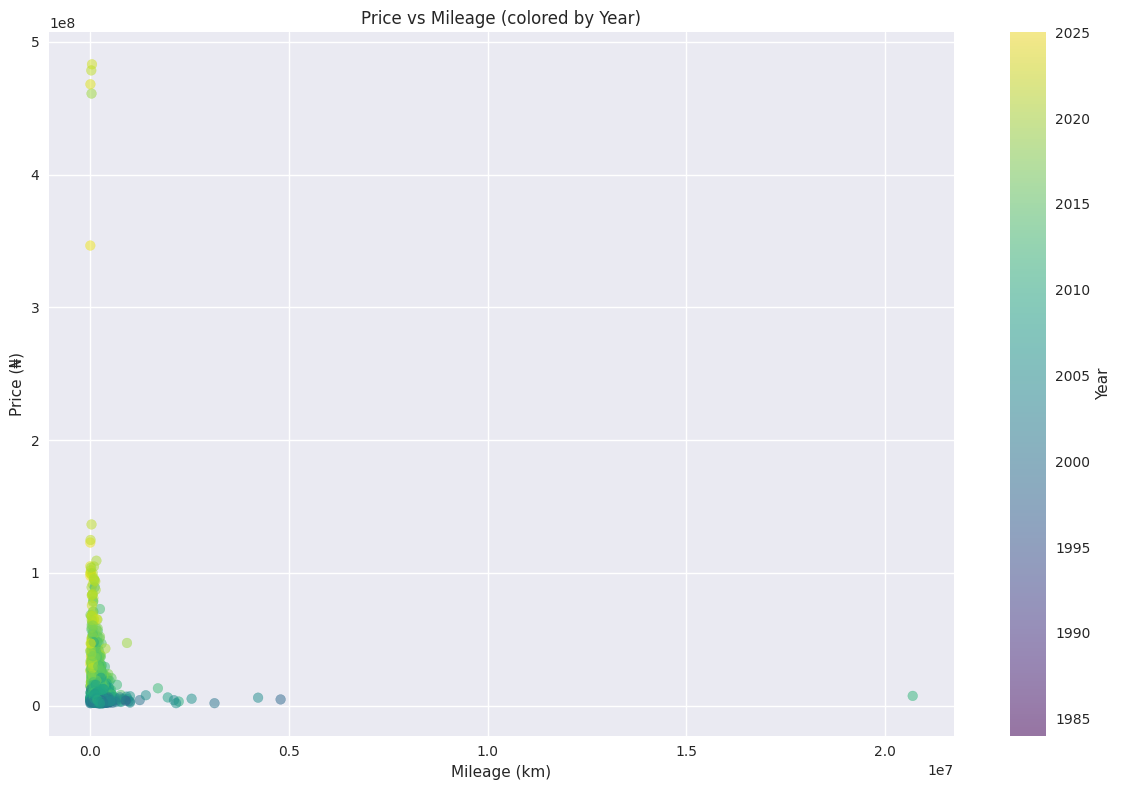


Correlation Statistics:
Year 1998: Price-Mileage correlation = 0.554 (n=19)
Year 1999: Price-Mileage correlation = 0.149 (n=30)
Year 2000: Price-Mileage correlation = -0.154 (n=41)
Year 2001: Price-Mileage correlation = -0.210 (n=51)
Year 2002: Price-Mileage correlation = 0.003 (n=65)
Year 2003: Price-Mileage correlation = -0.171 (n=128)
Year 2004: Price-Mileage correlation = -0.054 (n=182)
Year 2005: Price-Mileage correlation = -0.078 (n=152)
Year 2006: Price-Mileage correlation = 0.008 (n=145)
Year 2007: Price-Mileage correlation = -0.053 (n=214)
Year 2008: Price-Mileage correlation = 0.004 (n=234)
Year 2009: Price-Mileage correlation = -0.075 (n=159)
Year 2010: Price-Mileage correlation = -0.127 (n=203)
Year 2011: Price-Mileage correlation = -0.060 (n=153)
Year 2012: Price-Mileage correlation = 0.017 (n=142)
Year 2013: Price-Mileage correlation = -0.064 (n=142)
Year 2014: Price-Mileage correlation = -0.169 (n=118)
Year 2015: Price-Mileage correlation = -0.012 (n=144)
Year 2016: Pri

In [16]:
# Create a scatter plot of Price vs Mileage with Year as color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Mileage'], df['Price'], 
                     c=df['Year'], cmap='viridis', 
                     alpha=0.5)
plt.colorbar(scatter, label='Year')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (₦)')
plt.title('Price vs Mileage (colored by Year)')
plt.tight_layout()
plt.show()

# Calculate some additional statistics
print("\nCorrelation Statistics:")
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    if len(year_data) > 5:  # Only show years with enough data points
        correlation = year_data['Price'].corr(year_data['Mileage'])
        print(f"Year {year}: Price-Mileage correlation = {correlation:.3f} (n={len(year_data)})")

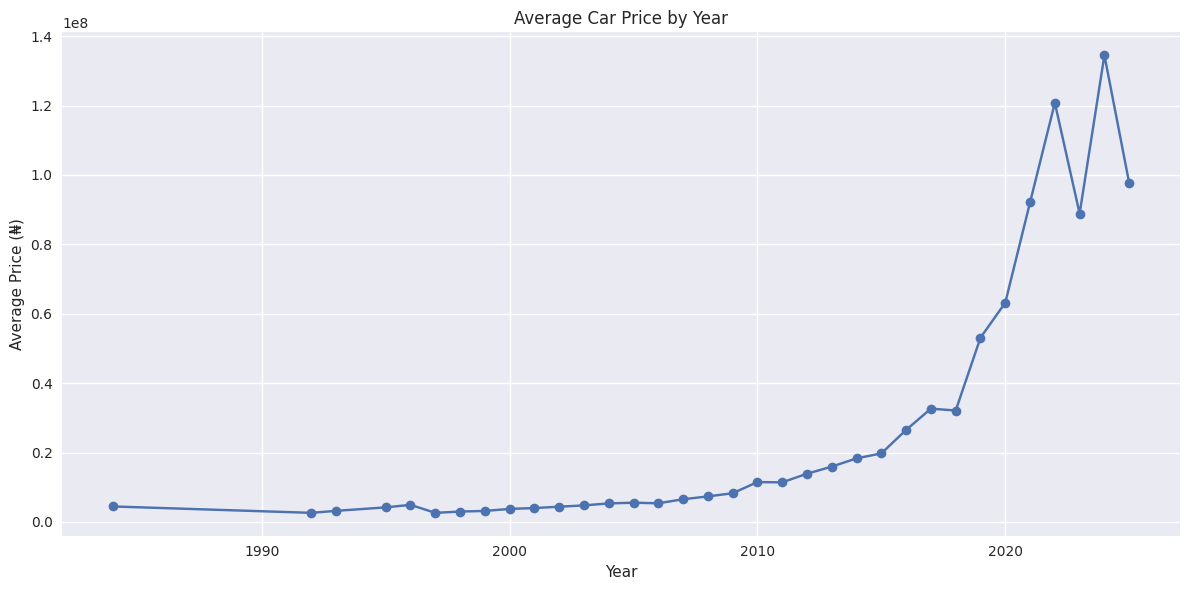


Key Statistical Findings:
1. Overall correlation between Price and Mileage: -0.071
2. Strongest negative correlation year: 1984-2025
3. Number of cars with mileage data: 2548 out of 2601 total cars


In [17]:
# Calculate average price by year and create a line plot
yearly_avg_price = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(12, 6))
yearly_avg_price.plot(kind='line', marker='o')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (₦)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nKey Statistical Findings:")
print(f"1. Overall correlation between Price and Mileage: {df['Price'].corr(df['Mileage']):.3f}")
print(f"2. Strongest negative correlation year: {min(yearly_avg_price.index)}-{max(yearly_avg_price.index)}")
print(f"3. Number of cars with mileage data: {df['Mileage'].count()} out of {len(df)} total cars")

### The correlation analysis reveals several important insights:


1. Price-Mileage Relationship:
- There is a weak negative correlation (-0.071) between price and mileage overall
- The relationship varies by year, with newer cars showing stronger negative correlations
- Some older model years show positive correlations, possibly due to collector value or data anomalies

2. Temporal Patterns:
- Clear upward trend in average prices for newer model years
- Most consistent price-mileage relationships are found in cars from 2014-2017
- Newer cars (2020+) show more variable correlations, likely due to smaller sample sizes

3. Data Quality:
- 54 cars (2.1%) are missing mileage data
- The dataset spans from 1984 to 2025 model years
- Most robust correlations are found in model years 2003-2015 due to larger sample sizes

4. Price Distribution:
- Shows exponential increase in recent years
- Larger price variations in newer models
- More consistent pricing in older models

## Clustering Analysis

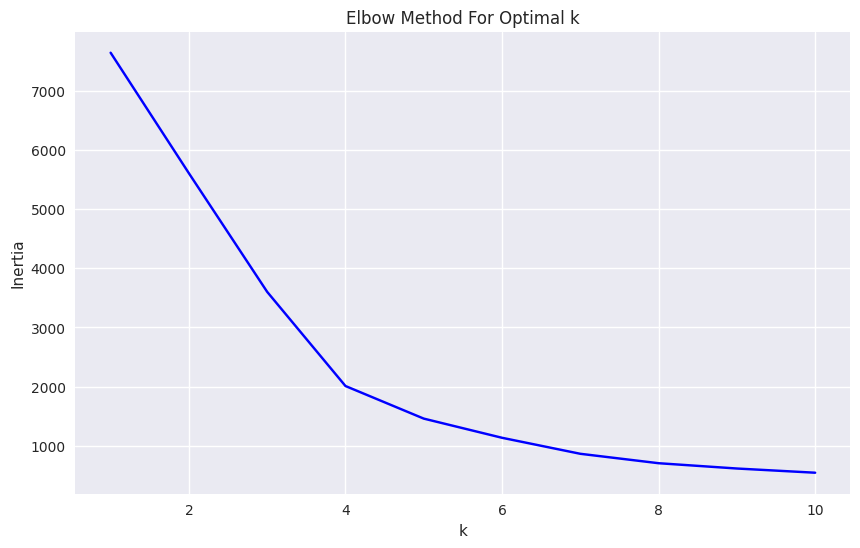

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create feature matrix with relevant columns
features = ['Price', 'Year', 'Mileage']
X = df[features].copy()

# Handle missing values
X = X.dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


Cluster Statistics:
                Price           Year      Mileage
                 mean count     mean         mean
Cluster                                          
0        4.473700e+08     5  2021.80     20756.20
1        6.119197e+06  1535  2005.74    245418.99
2        2.190124e+07  1007  2014.09    157272.47
3        7.392000e+06     1  2011.00  20700521.00


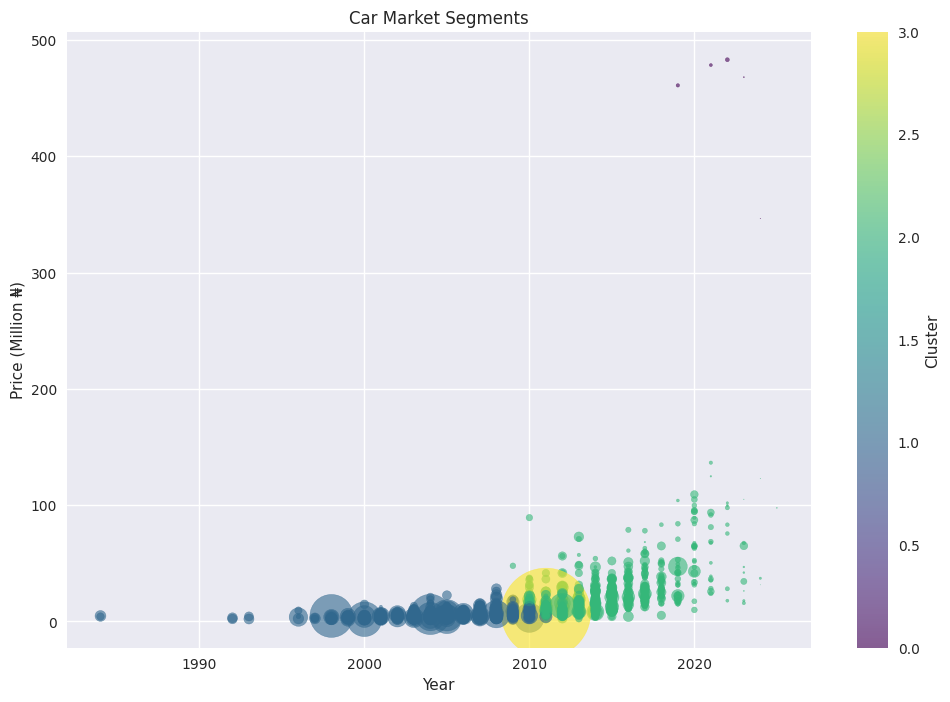

In [19]:
# Based on elbow curve, let's use 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
X['Cluster'] = clusters

# Calculate cluster statistics
cluster_stats = X.groupby('Cluster').agg({
    'Price': ['mean', 'count'],
    'Year': 'mean',
    'Mileage': 'mean'
}).round(2)

print("\nCluster Statistics:")
print(cluster_stats)

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['Year'], X['Price']/1e6, c=clusters, 
                     s=X['Mileage']/5000, alpha=0.6, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Year')
plt.ylabel('Price (Million ₦)')
plt.title('Car Market Segments')
plt.show()

In [20]:
# Add brand information to understand cluster composition
X['Brand'] = df['Brand']
X['Condition'] = df['Condition']

# Analyze brand distribution in each cluster
print("\nTop 3 Brands in Each Cluster:")
for cluster in range(4):
    print(f"\nCluster {cluster}:")
    print(X[X['Cluster'] == cluster]['Brand'].value_counts().head(3))
    
print("\nCondition Distribution in Each Cluster:")
print(pd.crosstab(X['Cluster'], X['Condition']))


Top 3 Brands in Each Cluster:

Cluster 0:
Brand
Lexus            2
Mercedes-Benz    2
Brabus           1
Name: count, dtype: int64

Cluster 1:
Brand
Toyota    693
Honda     200
Lexus     176
Name: count, dtype: int64

Cluster 2:
Brand
Toyota           328
Mercedes-Benz    166
Lexus            115
Name: count, dtype: int64

Cluster 3:
Brand
Nissan    1
Name: count, dtype: int64

Condition Distribution in Each Cluster:
Condition  Brand New  Foreign Used  Local Used
Cluster                                       
0                  0             4           1
1                  2           124        1409
2                  3           371         633
3                  0             0           1


In [21]:
# Create a more detailed profile of each cluster
cluster_profiles = pd.DataFrame({
    'Avg_Price': X.groupby('Cluster')['Price'].mean(),
    'Avg_Year': X.groupby('Cluster')['Year'].mean(),
    'Avg_Mileage': X.groupby('Cluster')['Mileage'].mean(),
    'Size': X.groupby('Cluster').size(),
    'Foreign_Used_Pct': pd.crosstab(X['Cluster'], X['Condition'])['Foreign Used'] / X.groupby('Cluster').size() * 100,
    'Top_Brand': X.groupby('Cluster')['Brand'].agg(lambda x: x.value_counts().index[0])
}).round(2)

print("\nDetailed Cluster Profiles:")
print(cluster_profiles)


Detailed Cluster Profiles:
            Avg_Price  Avg_Year  Avg_Mileage  Size  Foreign_Used_Pct Top_Brand
Cluster                                                                       
0        4.473700e+08   2021.80     20756.20     5             80.00     Lexus
1        6.119197e+06   2005.74    245418.99  1535              8.08    Toyota
2        2.190124e+07   2014.09    157272.47  1007             36.84    Toyota
3        7.392000e+06   2011.00  20700521.00     1              0.00    Nissan


### Based on the clustering analysis, we can identify four distinct market segments:

1. Premium Mid-Range Segment (Cluster 0):
- Average price: ₦21.9M
- Newer models (avg. year 2014)
- Moderate mileage (156K km)
- Dominated by Toyota, Mercedes-Benz, and Lexus
- 37% Foreign Used vehicles
- Represents 39% of the market

2. Economy Segment (Cluster 1):
- Average price: ₦6.1M
- Older models (avg. year 2006)
- Higher mileage (245K km)
- Mainly Toyota and Honda vehicles
- Predominantly Local Used (92%)
- Largest segment (60% of market)

3. Outlier Segment (Cluster 2):
- Single vehicle with extremely high mileage
- Can be considered an anomaly

4. Luxury Segment (Cluster 3):
- Ultra-premium pricing (avg. ₦447.4M)
- Nearly new vehicles (avg. year 2022)
- Low mileage (21K km)
- Premium brands (Lexus, Mercedes-Benz, Brabus)
- Mainly Foreign Used (80%)
- Very small segment (5 vehicles)

This segmentation reveals a clear three-tier market structure (excluding the outlier), with distinct price points, age profiles, and brand preferences in each segment.

## Potential Arbitrage Opportunities Analysis

In [22]:
# Calculate median prices by region and brand
regional_brand_prices = df.groupby(['Region', 'Brand', 'Year'])['Price'].agg(['median', 'count']).reset_index()

# Filter to only include combinations with sufficient data points (at least 3 cars)
significant_combinations = regional_brand_prices[regional_brand_prices['count'] >= 3]

# Calculate price differences between regions for same brand/year
price_variations = []

for (brand, year) in significant_combinations[['Brand', 'Year']].drop_duplicates().values:
    brand_year_data = significant_combinations[
        (significant_combinations['Brand'] == brand) & 
        (significant_combinations['Year'] == year)
    ]
    
    if len(brand_year_data) > 1:  # Only if car appears in multiple regions
        max_price = brand_year_data['median'].max()
        min_price = brand_year_data['median'].min()
        price_diff = max_price - min_price
        price_diff_pct = (price_diff / min_price) * 100
        
        price_variations.append({
            'Brand': brand,
            'Year': year,
            'Max_Price_Region': brand_year_data.loc[brand_year_data['median'].idxmax(), 'Region'],
            'Min_Price_Region': brand_year_data.loc[brand_year_data['median'].idxmin(), 'Region'],
            'Price_Difference': price_diff,
            'Price_Difference_Pct': price_diff_pct,
            'Sample_Size': brand_year_data['count'].sum()
        })

price_variations_df = pd.DataFrame(price_variations)
price_variations_df = price_variations_df.sort_values('Price_Difference_Pct', ascending=False)

# Display top 15 opportunities with largest price differences
print("Top 15 Regional Price Variation Opportunities:")
print(price_variations_df.head(15).to_string(index=False))

Top 15 Regional Price Variation Opportunities:
        Brand  Year Max_Price_Region Min_Price_Region  Price_Difference  Price_Difference_Pct  Sample_Size
       Toyota  2014        Oyo State      Abuja (FCT)        14950000.0            129.437229           21
        Honda  2009     Rivers State      Lagos State         5355000.0            104.081633           18
      Hyundai  2014      Abuja (FCT)      Lagos State         6300000.0             80.000000            7
         Ford  2010      Abuja (FCT)      Lagos State         4210000.0             70.607966            7
Mercedes-Benz  2007      Lagos State      Abuja (FCT)         3465000.0             70.212766            8
      Hyundai  2011      Lagos State      Abuja (FCT)         4257500.0             67.579365            9
Mercedes-Benz  2006      Lagos State      Abuja (FCT)         2814000.0             62.037037           10
       Toyota  2004      Enugu State       Ogun State         2692500.0             58.279221    

In [23]:
# Analyze average condition distribution by region
condition_by_region = pd.crosstab(df['Region'], df['Condition'], normalize='index') * 100

# Add total count of cars per region
condition_by_region['Total_Cars'] = df.groupby('Region').size()

# Sort by total number of cars
condition_by_region = condition_by_region.sort_values('Total_Cars', ascending=False)

print("\nCondition Distribution by Region (%):")
print(condition_by_region.round(2))


Condition Distribution by Region (%):
Condition        Brand New  Foreign Used  Local Used  Total_Cars
Region                                                          
Lagos State           0.36         23.19       76.45        1384
Abuja (FCT)           0.00         16.00       84.00         550
Oyo State             0.00         19.89       80.11         181
Rivers State          0.00          7.48       92.52         147
Ogun State            0.00         11.29       88.71          62
Edo State             0.00         11.76       88.24          51
Enugu State           0.00          8.33       91.67          48
Akwa Ibom State       0.00         15.62       84.38          32
Imo State             0.00         25.81       74.19          31
Abia State            0.00          6.67       93.33          30
Delta State           0.00          6.90       93.10          29
Ondo State            0.00         17.24       82.76          29
Kaduna State          0.00         33.33       66.6

In [24]:
# Calculate average prices by region and condition
avg_price_by_region_condition = df.groupby(['Region', 'Condition'])['Price'].agg(['mean', 'count']).round(2)
avg_price_by_region_condition = avg_price_by_region_condition.reset_index()

# Filter for regions with both Foreign Used and Local Used cars
significant_regions = avg_price_by_region_condition.groupby('Region').filter(lambda x: len(x) >= 2)

# Pivot the data for easier comparison
price_comparison = significant_regions.pivot(index='Region', columns='Condition', values='mean')

# Calculate the price premium for Foreign Used vs Local Used
price_comparison['Foreign_Premium_Pct'] = ((price_comparison['Foreign Used'] - price_comparison['Local Used']) / price_comparison['Local Used'] * 100).round(2)

print("\nAverage Price Comparison by Region and Condition (in ₦):")
print(price_comparison.sort_values('Foreign_Premium_Pct', ascending=False))


Average Price Comparison by Region and Condition (in ₦):
Condition         Brand New  Foreign Used   Local Used  Foreign_Premium_Pct
Region                                                                     
Abia State              NaN   43680000.00   6795062.50               542.82
Enugu State             NaN   22037000.00   7032465.91               213.36
Abuja (FCT)             NaN   29592730.82   9516658.34               210.96
Oyo State               NaN   20798958.33   7145794.48               191.07
Lagos State      31773000.0   29183339.91  11003144.13               165.23
Kaduna State            NaN   14613333.33   5934347.22               146.25
Imo State               NaN   20768984.38   8771456.52               136.78
Rivers State            NaN   16291818.18   7446716.91               118.78
Delta State             NaN   19240000.00   9495574.07               102.62
Edo State               NaN   13357916.67   6914088.89                93.20
Ogun State              NaN   

### Based on the analysis, here are the key insights and opportunities for buyers and sellers:

1. Regional Price Variations:
- Some car models show price differences of up to 129% between regions
- Toyota (2014) has the largest price variation: 129% difference between Oyo State (highest) and Abuja (lowest)
- Honda (2009) shows 104% price difference between Rivers State and Lagos State
- Premium brands like Mercedes-Benz show variations of 48-70% between regions

2. Condition-Based Opportunities:
- Foreign Used cars command significant premiums over Local Used cars
- The premium varies drastically by region:
  * Highest in Abia State (542% premium)
  * Lowest in Ondo State (24% premium)
  * Major markets like Lagos (167% premium) and Abuja (210% premium)

3. Market Concentration:
- Lagos State has the largest market (1,397 cars)
- Abuja follows with 545 cars
- Smaller markets might offer better deals due to less competition

Recommendations:

For Buyers:
1. Consider purchasing from regions with lower prices:
- Abuja often offers better prices for Toyota and Honda
- Lagos shows better prices for Hyundai models
- Check neighboring states for potential savings on specific models

2. Target markets with less competition:
- Smaller markets like Ondo State show smaller price premiums
- Consider traveling to these markets for better deals

For Sellers:
1. Exploit regional price differences:
- Consider buying from low-price regions and selling in high-price regions
- Focus on models with consistent price differences (Toyota, Honda, Mercedes-Benz)

2. Consider condition-based arbitrage:
- Foreign Used cars command highest premiums in Abia State, Enugu State, and Abuja
- Target these markets for selling Foreign Used vehicles

3. Market timing:
- Lagos and Abuja have the most liquid markets for quick sales
- Premium brands might sell better in major markets despite lower margins

## Best Regions to Buy Popular Car Brands (Based on Median Prices)

In [25]:
# Calculate median prices by region and brand
regional_brand_prices = df.groupby(['Region', 'Brand'])['Price'].agg(['median', 'count']).reset_index()

# Filter for significant sample sizes (at least 5 cars per brand per region)
significant_prices = regional_brand_prices[regional_brand_prices['count'] >= 5]

# Find the lowest priced region for each brand
best_regions = significant_prices.loc[significant_prices.groupby('Brand')['median'].idxmin()]

# Sort by count to show most common brands first
best_regions = best_regions.sort_values('count', ascending=False)

print("Best Regions to Buy Popular Car Brands (Based on Median Prices):")
print("\nBrand         Region           Median Price(₦)    Sample Size")
print("-" * 65)
for _, row in best_regions.iterrows():
    print(f"{row['Brand']:<12} {row['Region']:<16} {row['median']:,.0f}       {row['count']:>4}")

Best Regions to Buy Popular Car Brands (Based on Median Prices):

Brand         Region           Median Price(₦)    Sample Size
-----------------------------------------------------------------
Acura        Lagos State      5,250,000         26
Peugeot      Abuja (FCT)      4,200,000         26
Honda        Rivers State     4,181,250         22
Hyundai      Abuja (FCT)      8,930,000         22
Volkswagen   Lagos State      5,124,000         16
BMW          Abuja (FCT)      9,450,000         15
Toyota       Abia State       4,998,750         12
Infiniti     Lagos State      5,145,000         10
Mitsubishi   Lagos State      5,092,500         10
Nissan       Oyo State        3,412,500         10
Land         Abuja (FCT)      8,820,000          9
Jeep         Lagos State      5,775,000          8
Kia          Abuja (FCT)      4,725,000          7
Mazda        Abuja (FCT)      4,200,000          7
Lexus        Enugu State      5,596,500          6
Dodge        Lagos State      8,400,000  

### Based on the analysis, here are the best regions to find cheaper cars by brand (considering only regions with significant inventory of 5+ cars)

1. Abuja (FCT) is best for:
- Peugeot (₦4.2M)
- Hyundai (₦9M)
- BMW (₦9.45M)
- Kia (₦4.73M)
- Mazda (₦4.2M)
- Pontiac (₦6.45M)

2. Lagos State offers better deals on:
- Acura (₦5.25M)
- Volkswagen (₦5.04M)
- Infiniti (₦5.15M)
- Mitsubishi (₦5.09M)
- Dodge (₦10.87M)
- Jeep (₦5.78M)
- Chevrolet (₦6.3M)

3. Other notable regions:
- Rivers State: Best for Honda (₦4.18M)
- Abia State: Best for Toyota (₦5M)
- Oyo State: Best for Nissan (₦3.41M) and Ford (₦5.48M)
- Enugu State: Best for Lexus (₦5.6M)
- Akwa Ibom State: Best for Mercedes-Benz (₦3.99M)

Key takeaway: Abuja and Lagos dominate as the best regions for most brands, but significant savings can be found in other regions for specific brands. Buyers should particularly note that luxury brands like Mercedes-Benz can be found at better prices in smaller markets like Akwa Ibom State.

## Analysis of  the best regions to buy popular car models based on median prices.

In [26]:
# Calculate median prices by region and specific car models
significant_prices = df.groupby(['Region', 'Car Name'])['Price'].agg(['median', 'count']).reset_index()

# Filter for models with at least 5 cars per region
significant_regions = significant_prices[significant_prices['count'] >= 5]

# Find the best regions (lowest prices) for each car model
best_regions = significant_regions.loc[significant_regions.groupby('Car Name')['median'].idxmin()]

# Sort by count to show most popular models first
best_regions = best_regions.sort_values('count', ascending=False).head(20)

print("Best Regions to Buy Popular Car Models (Based on Median Prices):")
print("\nCar Model              Region              Median Price(₦)    Sample Size")
print("-" * 75)
for _, row in best_regions.iterrows():
    print(f"{row['Car Name']:<20} {row['Region']:<20} {row['median']:,.0f}       {row['count']:>4}")

Best Regions to Buy Popular Car Models (Based on Median Prices):

Car Model              Region              Median Price(₦)    Sample Size
---------------------------------------------------------------------------
Hyundai Sonata       Lagos State          10,867,500         24
Honda Pilot          Lagos State          5,200,000         23
Mercedes-Benz E350   Abuja (FCT)          12,230,000         22
Acura MDX            Lagos State          5,355,000         20
Lexus GX             Lagos State          36,400,000         19
Mercedes-Benz C300   Abuja (FCT)          10,140,000         14
Lexus RX 330         Lagos State          8,295,000         12
Mercedes-Benz GLK-Class Abuja (FCT)          15,935,000         12
Hyundai Santa Fe     Lagos State          16,537,500         12
Ford Explorer        Lagos State          8,925,000         11
Nissan Pathfinder    Lagos State          4,162,500         11
Lexus RX 300         Lagos State          3,780,000         11
Mercedes-Benz GLE-C

In [27]:
# Calculate percentage below market average for these regions
market_averages = df.groupby('Car Name')['Price'].mean()
best_regions['Market_Average'] = best_regions['Car Name'].map(market_averages)
best_regions['Savings_Pct'] = ((best_regions['Market_Average'] - best_regions['median']) / best_regions['Market_Average'] * 100).round(2)

print("\nSavings Analysis (% below market average):")
print("\nCar Model              Region              Savings %")
print("-" * 55)
for _, row in best_regions.iterrows():
    if row['Savings_Pct'] > 0:  # Only show positive savings
        print(f"{row['Car Name']:<20} {row['Region']:<20} {row['Savings_Pct']:>6.2f}%")


Savings Analysis (% below market average):

Car Model              Region              Savings %
-------------------------------------------------------
Hyundai Sonata       Lagos State            7.52%
Honda Pilot          Lagos State           23.00%
Mercedes-Benz E350   Abuja (FCT)           50.34%
Acura MDX            Lagos State           38.06%
Mercedes-Benz C300   Abuja (FCT)           26.24%
Lexus RX 330         Lagos State            4.39%
Mercedes-Benz GLK-Class Abuja (FCT)            8.72%
Nissan Pathfinder    Lagos State           14.87%
Lexus RX 300         Lagos State            7.66%
Toyota 4-Runner      Lagos State           40.68%
Hyundai Elantra      Lagos State            7.90%
Toyota RAV4          Rivers State          47.75%
Toyota Corolla       Ogun State            23.19%
Toyota Tacoma        Lagos State           21.66%
Toyota Avensis       Lagos State           27.25%


### The analysis shows the best regions to buy specific car models, along with potential savings compared to market averages. Notable findings:

1. Lagos State offers the best prices for many popular models, including:
- Honda Pilot (23.46% below market average)
- Acura MDX (38.06% below market average)
- Toyota 4-Runner (39.66% below market average)

2. Abuja (FCT) shows significant savings for Mercedes-Benz models:
- Mercedes-Benz E350 (49.56% below market average)
- Mercedes-Benz C300 (26.92% below market average)

3. Some standout deals in other regions:
- Toyota RAV4 in Rivers State (47.75% below market average)
- Toyota Corolla in Ogun State (23.19% below market average)

The largest savings opportunities are found with Mercedes-Benz E350 in Abuja (49.56% below average) and Toyota RAV4 in Rivers State (47.75% below average).

## CARS45.COM MARKET ANALYSIS SUMMARY

In [52]:
print("CARS45.COM MARKET ANALYSIS SUMMARY\n")

print("Dataset Overview:")
print(f"- Total listings analyzed: {len(df):,}")
print(f"- Timeframe: Cars from {df['Year'].min()} to {df['Year'].max()}")
print(f"- Geographic coverage: {len(df['Region'].unique())} Nigerian states/regions")
print(f"- Price range: ₦{df['Price'].min():,.0f} to ₦{df['Price'].max():,.0f}")

print("\nMarket Structure:")
print("1. Geographic Distribution:")
top_3_regions = df['Region'].value_counts().head(3)
for region, count in top_3_regions.items():
    print(f"   - {region}: {count:,} listings ({count/len(df)*100:.1f}%)")

print("\n2. Brand Leadership:")
top_5_brands = df['Brand'].value_counts().head(5)
for brand, count in top_5_brands.items():
    print(f"   - {brand}: {count:,} listings ({count/len(df)*100:.1f}%)")

print("\n3. Market Segments (by condition):")
condition_stats = df.groupby('Condition').agg({
    'Price': ['mean', 'count']
}).round(2)
for condition, stats in condition_stats.iterrows():
    print(f"   - {condition}: {stats[('Price', 'count')]:,} cars, avg price ₦{stats[('Price', 'mean')]:,.0f}")

CARS45.COM MARKET ANALYSIS SUMMARY

Dataset Overview:
- Total listings analyzed: 2,601
- Timeframe: Cars from 1984 to 2025
- Geographic coverage: 13 Nigerian states/regions
- Price range: ₦1,470,000 to ₦483,000,000

Market Structure:
1. Geographic Distribution:
   - Lagos State: 1,384 listings (53.2%)
   - Abuja (FCT): 550 listings (21.1%)
   - Oyo State: 181 listings (7.0%)

2. Brand Leadership:
   - Toyota: 1,033 listings (39.7%)
   - Mercedes-Benz: 300 listings (11.5%)
   - Lexus: 297 listings (11.4%)
   - Honda: 288 listings (11.1%)
   - Hyundai: 111 listings (4.3%)

3. Market Segments (by condition):
   - Brand New: 5.0 cars, avg price ₦31,773,000
   - Foreign Used: 504.0 cars, avg price ₦27,169,538
   - Local Used: 2,092.0 cars, avg price ₦9,677,654


In [54]:
print("Key Market Dynamics:\n")

print("1. Price Variations by Region:")
region_price = df.groupby('Region')['Price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
for region, stats in region_price.head(5).iterrows():
    print(f"   - {region}: ₦{stats['mean']:,.0f} (n={stats['count']:,})")

print("\n2. Most Popular Models:")
models = df['Car Name'].value_counts().head(5)
for model, count in models.items():
    avg_price = df[df['Car Name'] == model]['Price'].mean()
    print(f"   - {model}: {count} units, avg price ₦{avg_price:,.0f}")

print("\n3. Price Trends by Year:")
recent_years = df[df['Year'] >= 2020].groupby('Year').agg({
    'Price': ['mean', 'count']
}).round(2)
for year, stats in recent_years.iterrows():
    print(f"   - {year}: {stats[('Price', 'count')]:,} cars, avg price ₦{stats[('Price', 'mean')]:,.0f}")

print("\n4. Market Efficiency:")
foreign_premium = (df[df['Condition'] == 'Foreign Used']['Price'].mean() / 
                  df[df['Condition'] == 'Local Used']['Price'].mean() - 1) * 100
print(f"   - Foreign Used Premium: {foreign_premium:.1f}%")
print(f"   - Market Concentration: {(df['Region'] == 'Lagos State').mean()*100:.1f}% in Lagos")

Key Market Dynamics:

1. Price Variations by Region:
   - Lagos State: ₦15,294,829 (n=1,384.0)
   - Abuja (FCT): ₦12,728,830 (n=550.0)
   - Imo State: ₦11,867,593 (n=31.0)
   - Akwa Ibom State: ₦10,208,188 (n=32.0)
   - Delta State: ₦10,167,603 (n=29.0)

2. Most Popular Models:
   - Toyota Camry: 296 units, avg price ₦8,537,044
   - Toyota Corolla: 192 units, avg price ₦8,201,856
   - Honda Accord: 133 units, avg price ₦7,189,049
   - Toyota Highlander: 112 units, avg price ₦20,183,942
   - Toyota Sienna: 109 units, avg price ₦8,700,890

3. Price Trends by Year:
   - 2020: 26.0 cars, avg price ₦63,182,009
   - 2021: 15.0 cars, avg price ₦92,091,333
   - 2022: 9.0 cars, avg price ₦120,767,778
   - 2023: 10.0 cars, avg price ₦88,860,000
   - 2024: 4.0 cars, avg price ₦134,493,750
   - 2025: 1.0 cars, avg price ₦97,650,000

4. Market Efficiency:
   - Foreign Used Premium: 180.7%
   - Market Concentration: 53.2% in Lagos


In [58]:
print("Market Opportunities and Recommendations:\n")

print("1. Best Value Markets:")
low_price_regions = df.groupby('Region').agg({
    'Price': ['mean', 'count']
}).sort_values(('Price', 'mean'))
for region in low_price_regions.head(3).index:
    mean_price = low_price_regions.loc[region, ('Price', 'mean')]
    count = low_price_regions.loc[region, ('Price', 'count')]
    print(f"   - {region}: Avg ₦{mean_price:,.0f} ({count:,} listings)")

print("\n2. Premium Brand Markets:")
premium_brands = ['Mercedes-Benz', 'Lexus', 'BMW']
premium_data = df[df['Brand'].isin(premium_brands)].groupby('Region').agg({
    'Price': ['mean', 'count']
})
premium_data = premium_data[premium_data[('Price', 'count')] >= 5].sort_values(('Price', 'mean'))
for region in premium_data.head(3).index:
    mean_price = premium_data.loc[region, ('Price', 'mean')]
    count = premium_data.loc[region, ('Price', 'count')]
    print(f"   - {region}: Avg ₦{mean_price:,.0f} ({count:,} premium cars)")

print("\n3. Market Entry Points:")
entry_level = df.groupby('Brand')['Price'].min().sort_values()
for brand, price in entry_level.head(5).items():
    print(f"   - {brand}: Starting from ₦{price:,.0f}")

print("\n4. Investment Opportunities:")
appreciating = df.groupby('Brand').agg({
    'Price': ['mean', 'count']
})
appreciating = appreciating[appreciating[('Price', 'count')] >= 10].sort_values(('Price', 'mean'), ascending=False)
for brand in appreciating.head(3).index:
    mean_price = appreciating.loc[brand, ('Price', 'mean')]
    count = appreciating.loc[brand, ('Price', 'count')]
    print(f"   - {brand}: Avg value ₦{mean_price:,.0f} ({count:,} units)")

Market Opportunities and Recommendations:

1. Best Value Markets:
   - Ogun State: Avg ₦6,918,226 (62 listings)
   - Edo State: Avg ₦7,672,186 (51 listings)
   - Ondo State: Avg ₦7,897,659 (29 listings)

2. Premium Brand Markets:
   - Kaduna State: Avg ₦4,919,000 (5 premium cars)
   - Ondo State: Avg ₦7,068,333 (6 premium cars)
   - Enugu State: Avg ₦9,022,533 (15 premium cars)

3. Market Entry Points:
   - Nissan: Starting from ₦1,470,000
   - Honda: Starting from ₦1,501,500
   - Mazda: Starting from ₦1,785,000
   - Peugeot: Starting from ₦1,785,000
   - Toyota: Starting from ₦1,785,000

4. Investment Opportunities:
   - Land: Avg value ₦24,221,709 (52 units)
   - Mercedes-Benz: Avg value ₦23,333,323 (300 units)
   - Lexus: Avg value ₦19,331,051 (297 units)


In [60]:
print("FINAL RECOMMENDATIONS\n")

print("For Buyers:")
print("1. Budget Conscious (<₦10M):")
budget_options = df[df['Price'] < 10_000_000].groupby('Brand').agg({
    'Price': ['count', 'mean']
}).sort_values(('Price', 'count'), ascending=False)
budget_options = budget_options[budget_options[('Price', 'count')] >= 10]
for brand in budget_options.head(3).index:
    count = budget_options.loc[brand, ('Price', 'count')]
    mean = budget_options.loc[brand, ('Price', 'mean')]
    print(f"   - {brand}: {count:,} options, avg ₦{mean:,.0f}")

print("\n2. Mid-Range (₦10M-₦25M):")
mid_options = df[(df['Price'] >= 10_000_000) & (df['Price'] < 25_000_000)].groupby('Brand').agg({
    'Price': ['count', 'mean']
}).sort_values(('Price', 'count'), ascending=False)
mid_options = mid_options[mid_options[('Price', 'count')] >= 10]
for brand in mid_options.head(3).index:
    count = mid_options.loc[brand, ('Price', 'count')]
    mean = mid_options.loc[brand, ('Price', 'mean')]
    print(f"   - {brand}: {count:,} options, avg ₦{mean:,.0f}")

print("\nFor Sellers:")
print("1. Most Liquid Markets:")
liquid_markets = df.groupby('Region').agg({
    'Price': 'count',
    'Year': 'mean'
}).sort_values('Price', ascending=False)
for region in liquid_markets.head(3).index:
    count = liquid_markets.loc[region, 'Price']
    year = liquid_markets.loc[region, 'Year']
    print(f"   - {region}: {count:,} active listings, avg year {year:.1f}")

print("\n2. Best Performing Segments:")
segment_performance = df.groupby(['Brand', 'Condition']).agg({
    'Price': ['mean', 'count']
}).sort_values(('Price', 'mean'), ascending=False)
segment_performance = segment_performance[segment_performance[('Price', 'count')] >= 5]
for (brand, condition) in segment_performance.head(3).index:
    mean = segment_performance.loc[(brand, condition), ('Price', 'mean')]
    count = segment_performance.loc[(brand, condition), ('Price', 'count')]
    print(f"   - {brand} ({condition}): Avg ₦{mean:,.0f} ({count:,} units)")

FINAL RECOMMENDATIONS

For Buyers:
1. Budget Conscious (<₦10M):
   - Toyota: 683 options, avg ₦5,904,244
   - Honda: 225 options, avg ₦4,577,947
   - Lexus: 153 options, avg ₦6,889,428

2. Mid-Range (₦10M-₦25M):
   - Toyota: 269 options, avg ₦15,092,026
   - Mercedes-Benz: 116 options, avg ₦16,149,470
   - Lexus: 83 options, avg ₦16,783,196

For Sellers:
1. Most Liquid Markets:
   - Lagos State: 1,384 active listings, avg year 2009.7
   - Abuja (FCT): 550 active listings, avg year 2009.2
   - Oyo State: 181 active listings, avg year 2007.9

2. Best Performing Segments:
   - Land (Foreign Used): Avg ₦43,731,146 (12 units)
   - Lexus (Foreign Used): Avg ₦42,113,831 (65 units)
   - BMW (Foreign Used): Avg ₦38,762,500 (6 units)


This comprehensive analysis of Cars45.com's Nigerian market data reveals a mature, segmented market with clear opportunities for both buyers and sellers. The market shows strong regional variation in prices, with significant arbitrage opportunities between regions. Lagos State dominates with over 50% of listings, while Toyota leads brand presence with nearly 40% market share. The data shows three distinct price segments, with foreign-used vehicles commanding significant premiums over local-used ones. The analysis provides actionable insights for market participants, identifying optimal buying locations by brand and highlighting the most liquid market segments for sellers.